In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps

In [25]:
df_AFLT = pd.read_csv(r'.\data\AFLT_100228_200305.csv')
df_AFLT

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,AFLT,D,20100301,0,55.70,56.44,55.01,55.25,288687
1,AFLT,D,20100302,0,55.30,55.75,54.85,54.85,309745
2,AFLT,D,20100303,0,55.15,55.50,54.30,55.10,862301
3,AFLT,D,20100304,0,55.00,55.00,54.06,54.80,768297
4,AFLT,D,20100305,0,54.86,55.35,54.80,55.05,485527
...,...,...,...,...,...,...,...,...,...
2516,AFLT,D,20200302,0,95.40,99.70,91.32,93.18,40583030
2517,AFLT,D,20200303,0,95.70,96.50,92.76,93.84,22529220
2518,AFLT,D,20200304,0,93.32,93.58,91.32,92.60,13754720
2519,AFLT,D,20200305,0,92.98,93.64,88.52,89.54,23862670


1) Скачать котировки акций компаний Аэрофлот (AFLT), ГАЗПРОМ ао
(GAZP), ЛУКОЙЛ (LKOH), Сбербанк (SBER), Акрон (AKRN) с периода 28.02.2010 по 5.03.2020 с сайта группы «ФИНАМ». Там же найдете названия компаний, соответствующие тикерам. Например, AFLT
— это тикер акций компании Аэрофлот, которые можно получить за
указанный промежуток с периода 28.02.2010 по 5.03.2020 включительно с сайта группы «Финам» по ссылке Котировки акций компании «Аэрофлот».

In [2]:
files = os.listdir('.\data')
files

['AFLT_100228_200305.csv',
 'AKRN_100228_200305.csv',
 'GAZP_100228_200305.csv',
 'LKOH_100228_200305.csv',
 'SBER_100228_200305.csv']

2) Составьте таблицу числа торговых дней по компаниям для каждого
календарного года за весь период (каждому календарному году соответствует отдельная колонка).

In [23]:
df = pd.DataFrame(columns=['Ticker', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])
for file_name in files:
    temp_df = pd.read_csv(f'.\data\{file_name}')
    output = [temp_df['<TICKER>'][0]]
    for y in ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']:
        c = 0
        for i in range(len(temp_df)):
            if str(temp_df['<DATE>'][i])[:4] == y:
                c += 1
        output.append(c)
    df.loc[len(df)] = output
df = df.set_index(['Ticker'])
df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Ticker,,,,,,,,,,,
AFLT,214,248,255,250,250,250,252,252,254,252,44
AKRN,214,248,255,250,250,250,252,252,254,252,44
GAZP,214,248,255,250,250,250,252,252,254,252,44
LKOH,214,248,255,250,250,250,252,252,254,252,44
SBER,214,248,255,250,250,250,252,252,254,252,44


3) Составьте таблицу годовых стоимостных объемов торгов по компаниям для каждого календарного года за весь период. Объем торгов
рассчитывается в миллиардах с округлением до 0,1. Необходимо указать единицу измерения объема.

In [26]:
df = pd.DataFrame(columns=['Ticker', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])
for file_name in files:
    temp_df = pd.read_csv(f'.\data\{file_name}')
    output = [temp_df['<TICKER>'][0]]
    for y in ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']:
        s = 0
        for i in range(len(temp_df)):
            if str(temp_df['<DATE>'][i])[:4] == y:
                s += temp_df['<CLOSE>'][i] * temp_df['<VOL>'][i]
        output.append(round(s / 1_000_000_000, 1))
    df.loc[len(df)] = output
df = df.set_index(['Ticker'])
df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Ticker,,,,,,,,,,,
AFLT,12.4,20.6,17.6,32.1,65.7,51.8,96.3,203.5,179.9,110.4,64.5
AKRN,7.1,13.7,6.2,4.5,4.7,5.5,4.6,4.8,4.7,3.1,4.3
GAZP,1969.6,3538.3,1620.1,1416.5,1753.9,1166.2,1079.8,935.4,979.2,2044.9,573.0
LKOH,645.2,964.2,691.3,467.4,681.0,711.3,597.8,464.1,868.7,1172.4,317.6
SBER,3512.2,5079.8,2970.2,1988.9,2674.0,2292.8,2228.6,2037.1,3507.1,2700.7,513.5


4) Изобразить график цены закрытия первой (для данного варианта)
компании за весь период. Здесь и далее цена закрытия рассчитывается на основе поля «CLOSE».

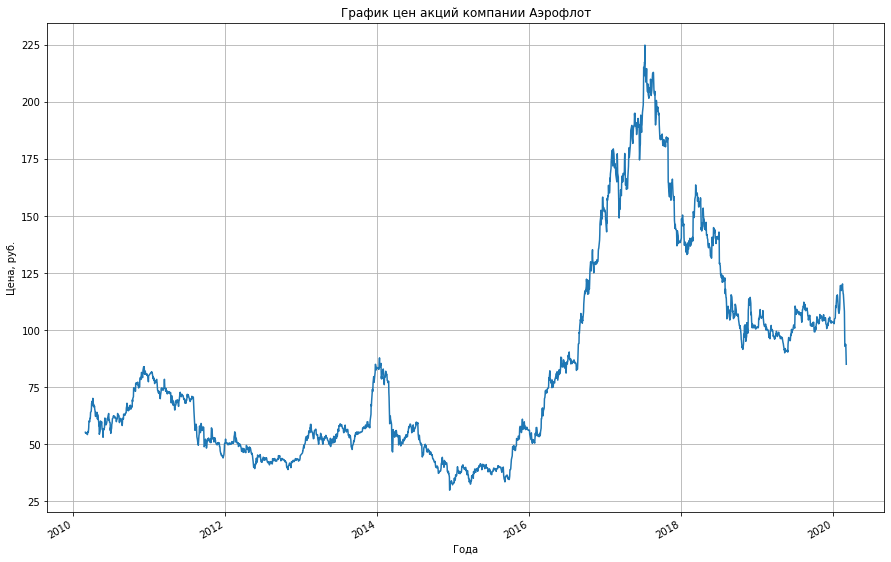

In [5]:
df_AFLT = pd.read_csv(r'.\data\AFLT_100228_200305.csv')
df_AFLT['<DATE>'] = pd.to_datetime(df_AFLT['<DATE>'], format="%Y%m%d")
df_AFLT = df_AFLT.set_index(['<DATE>'])

plt.figure(1, (15, 10))
df_AFLT['<CLOSE>'].plot()
plt.title('График цен акций компании Аэрофлот')
plt.xlabel('Года')
plt.ylabel('Цена, руб.')
plt.grid()
plt.show()

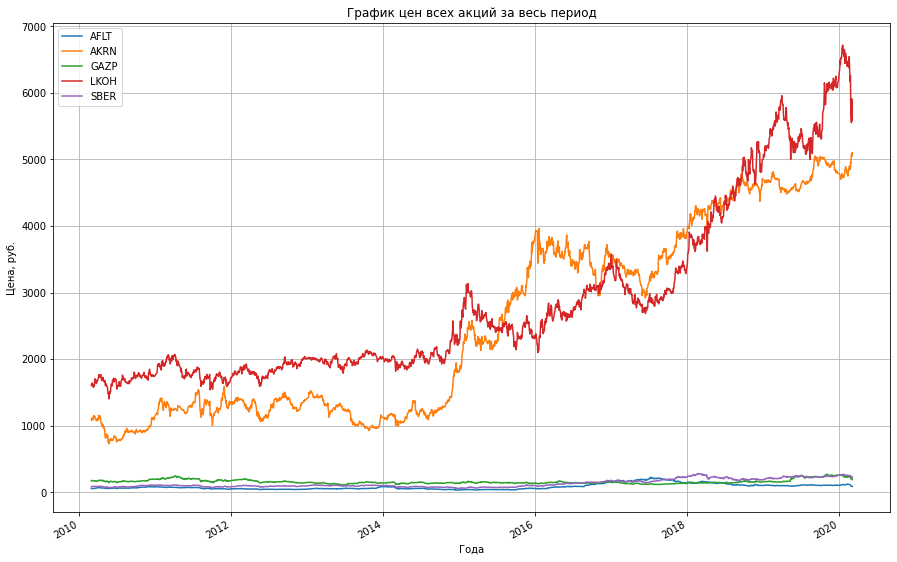

In [6]:
plt.figure(1, (15, 10))

for file_name in files:
    temp_df = pd.read_csv(f'.\data\{file_name}')
    temp_df['<DATE>'] = pd.to_datetime(temp_df['<DATE>'], format="%Y%m%d")
    temp_df = temp_df.set_index(['<DATE>'])
    temp_df['<CLOSE>'].plot(label=temp_df['<TICKER>'][0])

plt.title('График цен всех акций за весь период')
plt.xlabel('Года')
plt.ylabel('Цена, руб.')
plt.grid()
plt.legend()
plt.show()

5) Найти корреляционную 5х5 матрицу дневных логарифмических доходностей всех компаний за весь период (коэффициенты корреляции округляются до 0,001). Период может быть сужен при отсутствии данных.

In [7]:
df_log_return = pd.DataFrame()
columns = []
for file_name in files:
    temp_df = pd.read_csv(f'.\data\{file_name}')
    columns.append(temp_df['<TICKER>'][0])
    log_return = temp_df['<CLOSE>'].apply(np.log).diff()[1:]
    df_log_return = df_log_return.assign(new=log_return)
    df_log_return.columns = columns
df_log_return.corr().round(3)

,AFLT,AKRN,GAZP,LKOH,SBER
AFLT,1.000,0.241,0.363,0.288,0.435
AKRN,0.241,1.000,0.332,0.275,0.362
GAZP,0.363,0.332,1.000,0.568,0.591
LKOH,0.288,0.275,0.568,1.000,0.504
SBER,0.435,0.362,0.591,0.504,1.000


6) Составить таблицу интервальных частот дневной логарифмической доходности первой (для данного варианта) компании за последний полный
календарный год. Здесь и далее дневная логарифмическая доходность рассчитывается на основе поля «CLOSE» с коэффициентом 100.

In [8]:
log_ret = df_AFLT['<CLOSE>'].apply(np.log).diff() * 100
df_AFLT_2019 = []
for r in df_AFLT['<CLOSE>'].index:
    if r >= pd.to_datetime('2019-1-1') and r < pd.to_datetime('2020-1-1'):
        df_AFLT_2019.append(log_ret[r])
indexes = np.linspace(min(df_AFLT_2019), max(df_AFLT_2019), 101)
values = [0] * 100
for r in df_AFLT_2019:
    for i in range(len(indexes)):
        if r < indexes[i]:
            values[i-1] += 1
            break
for i in range(len(values)):
    print(f'({indexes[i]} - {indexes[i + 1]}): {values[i]}')

(-4.220845210878554 - -4.122860221312357): 1
(-4.122860221312357 - -4.02487523174616): 0
(-4.02487523174616 - -3.9268902421799625): 0
(-3.9268902421799625 - -3.8289052526137652): 0
(-3.8289052526137652 - -3.730920263047568): 0
(-3.730920263047568 - -3.6329352734813707): 0
(-3.6329352734813707 - -3.5349502839151734): 0
(-3.5349502839151734 - -3.436965294348976): 0
(-3.436965294348976 - -3.338980304782779): 0
(-3.338980304782779 - -3.2409953152165816): 0
(-3.2409953152165816 - -3.1430103256503843): 0
(-3.1430103256503843 - -3.045025336084187): 0
(-3.045025336084187 - -2.9470403465179897): 1
(-2.9470403465179897 - -2.8490553569517925): 0
(-2.8490553569517925 - -2.751070367385595): 0
(-2.751070367385595 - -2.653085377819398): 1
(-2.653085377819398 - -2.5551003882532006): 0
(-2.5551003882532006 - -2.4571153986870033): 2
(-2.4571153986870033 - -2.359130409120806): 0
(-2.359130409120806 - -2.261145419554609): 0
(-2.261145419554609 - -2.1631604299884115): 1
(-2.1631604299884115 - -2.0651754404

7) Изобразить гистограмму частот (не плотности частот!), соответствующей
таблице частот из предыдущего пункта, и график плотности нормального
распределения в подходящих единицах измерения (на одном рисунке)

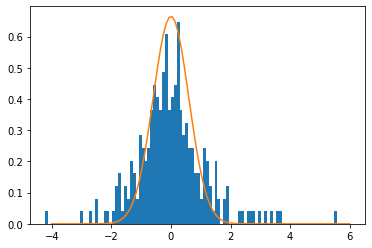

In [18]:
plt.hist(df_AFLT_2019, bins=100, density=1)
rv = sps.norm(0, 0.6)
x = np.linspace(-4,6,100)
y = [rv.pdf(i) for i in x]
plt.plot(x,y)
plt.show()